In [2]:
import pandas as pd
import matplotlib as plt

# file = "microbit_alti_v1_fallout.csv"
file = "data/flight3_all_values.csv"

data = pd.read_csv(file)
data.index = data['time']
data.index = data.index - data.index.min()

data["altitude"] = data["altitude"] - data["altitude"].min()

data["temperature"] = data["temperature"] - 18

data['delta'] = data['time'].diff()

data['vx'] = (data['delta'] * data['x_accelleration'].shift(1)).cumsum()
data['vy'] = (data['delta'] * data['x_accelleration'].shift(1)).cumsum()
data['vz'] = (data['delta'] * data['z_accelleration'].shift(1)).cumsum()

data['sx'] = (data['delta'] * data['vx'].shift(1)).cumsum()
data['sy'] = (data['delta'] * data['vy'].shift(1)).cumsum()
data['sz'] = (data['delta'] * data['vz'].shift(1)).cumsum()


data

    

,Time (milliseconds),time,accelleration,x_accelleration,y_accelleration,z_accelleration,temperature,x_magnet_strength,y_magnet_strength,z_magnet_strength,total_magnet_strength,altitude,delta,vx,vy,vz,sx,sy,sz
time,,,,,,,,,,,,,,,,,,,
0.0000,548078,548.0460,9.868529,0.47088,-1.56960,-9.731521,4,0.00495,0.04305,0.06525,0.078329,13.2219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0870,548167,548.1330,10.186690,0.62784,-1.56960,-10.045440,4,0.00585,0.04245,0.06480,0.077687,13.5469,0.0870,0.040967,0.040967,-0.846642,NaN,NaN,NaN
0.1390,548217,548.1850,9.586132,0.47088,-1.72656,-9.417601,4,0.00495,0.04245,0.06555,0.078252,12.9788,0.0520,0.073614,0.073614,-1.369005,0.002130,0.002130,-0.044025
0.1869,548270,548.2329,10.049120,0.47088,-1.72656,-9.888480,4,0.00525,0.04215,0.06570,0.078235,13.7081,0.0479,0.096169,0.096169,-1.820108,0.005656,0.005656,-0.109601
0.2710,548348,548.3170,9.778243,0.62784,-1.88352,-9.574560,4,0.00540,0.04170,0.06525,0.077625,12.9788,0.0841,0.135770,0.135770,-2.651729,0.013744,0.013744,-0.262672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34.0670,582144,582.1130,10.189110,0.47088,3.45312,9.574560,4,-0.01950,0.01770,-0.01680,0.031237,10.1939,0.0480,-59.778530,-59.778530,66.300427,-577.317404,-577.317404,797.580715
34.1150,582192,582.1610,9.435895,2.04048,1.41264,9.103681,4,-0.01830,0.01560,-0.01710,0.029507,10.5110,0.0480,-59.755928,-59.755928,66.760006,-580.186773,-580.186773,800.763135
34.1990,582277,582.2450,10.022120,3.13920,2.19744,9.260641,4,-0.01710,0.01290,-0.01740,0.027597,10.6774,0.0840,-59.584527,-59.584527,67.524715,-585.206271,-585.206271,806.370976


Text(0, 0.5, 'm/s^2')

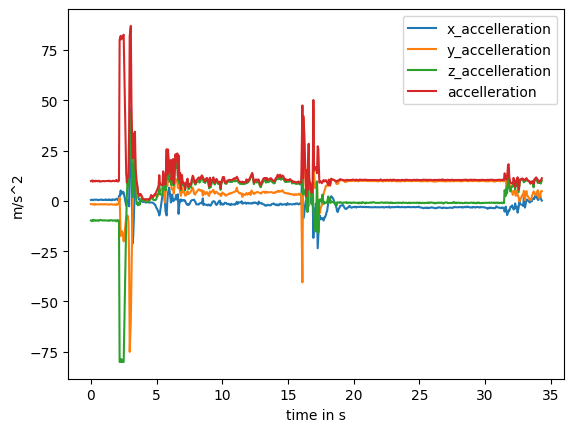

In [3]:
accelleration = data[["x_accelleration","y_accelleration","z_accelleration", "accelleration"]].plot()
accelleration.set_xlabel("time in s")
accelleration.set_ylabel("m/s^2")



<Axes: xlabel='time in s', ylabel='m above ground'>

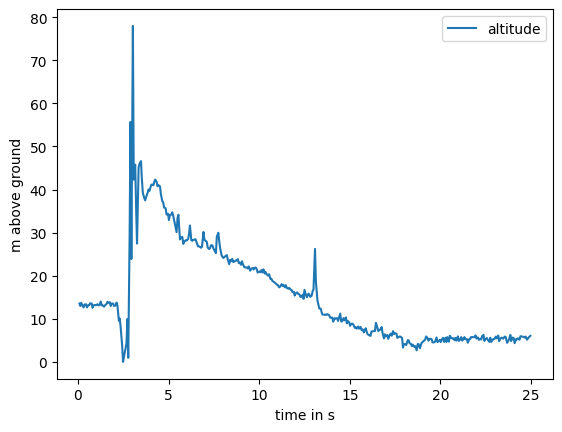

In [4]:

flight = data[(data.index > 0) & (data.index < 25)]

altitude = flight[["altitude"]].plot()
altitude.set_xlabel("time in s")
altitude.set_ylabel("m above ground")
altitude

77.98399999999998


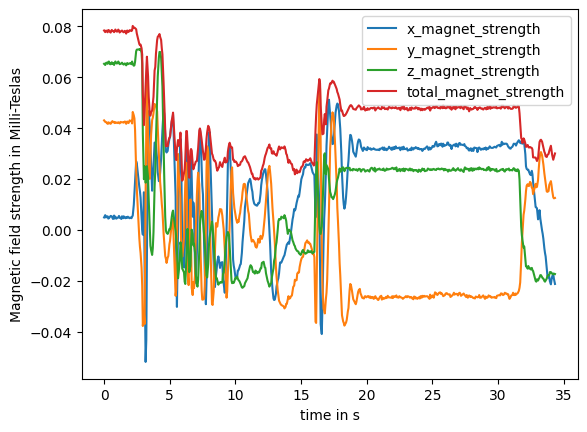

In [5]:
magnet_field = data[["x_magnet_strength", "y_magnet_strength", "z_magnet_strength", "total_magnet_strength"]].plot()
magnet_field.set_xlabel("time in s")
magnet_field.set_ylabel("Magnetic field strength in Milli-Teslas")
magnet_field

print(data["altitude"].max())



<Axes: xlabel='time in s', ylabel='temperature in Celsius'>

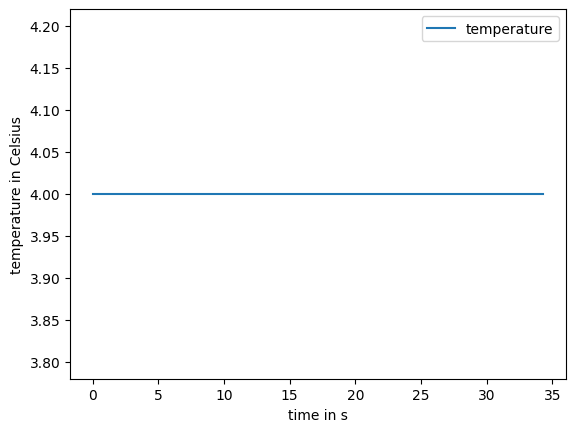

In [6]:
temperature = data[["temperature"]].plot()
temperature.set_xlabel("time in s")
temperature.set_ylabel("temperature in Celsius")
temperature

<Axes: xlabel='time in s', ylabel='velocity in m/s'>

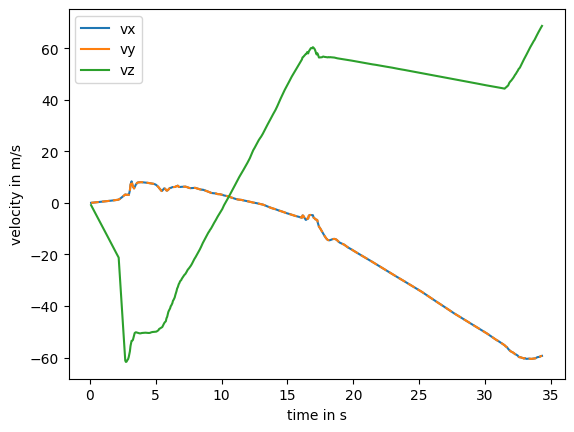

In [7]:
v = data[["vx", "vy", "vz"]].plot()
v.lines[1].set_linestyle("--")
v.set_xlabel("time in s")
v.set_ylabel("velocity in m/s")
v

<Axes: xlabel='time in s', ylabel='m and m/s^2'>

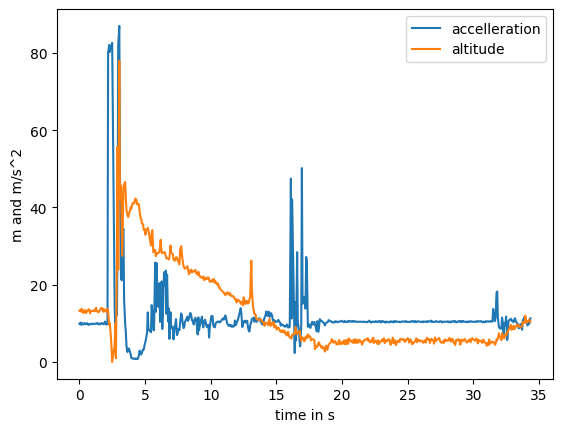

In [8]:
v = data[["accelleration", "altitude"]].plot()
v.set_xlabel("time in s")
v.set_ylabel("m and m/s^2")
v

<Axes: xlabel='time in s', ylabel='m above ground'>

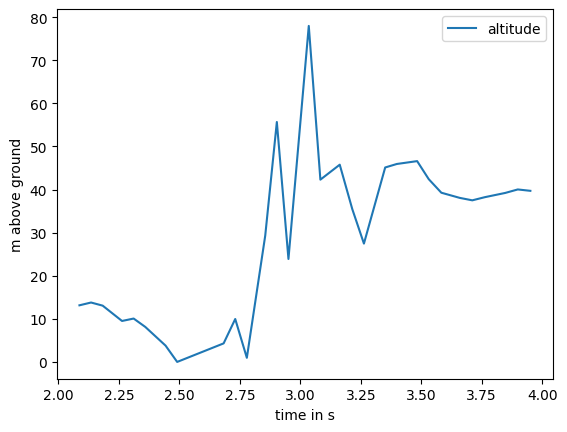

In [9]:
# Launching phase
flight = data[(data.index > 2) & (data.index < 4)]

altitude = flight[["altitude"]].plot()
altitude.set_xlabel("time in s")
altitude.set_ylabel("m above ground")
altitude

<Axes: xlabel='time in s', ylabel='m above ground'>

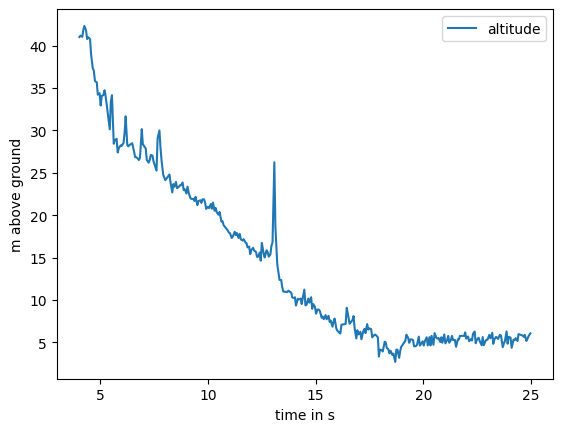

In [10]:
# Landing phase
flight = data[(data.index > 4) & (data.index < 25)]

altitude = flight[["altitude"]].plot()
altitude.set_xlabel("time in s")
altitude.set_ylabel("m above ground")
altitude